In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from lib import User, Movie, Recommender
import matplotlib.pylab as plt
import math
import numpy as np

In [6]:
rec = Recommender()
rec.initialize_from_csv("ml-latest-small/movies.csv", "ml-latest-small/ratings.csv")
print(len(rec.users))
print(len(rec.movies))

Initialized
Parsed ml-latest-small/ratings.csv
Parsed ml-latest-small/movies.csv


Reformatting movie ratings: 100%|██████████| 9724/9724 [00:00<00:00, 150618.61it/s]

610
9724


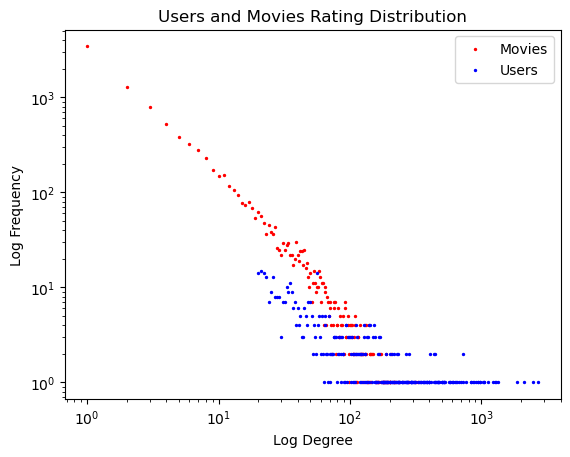

In [7]:
user_freq = {}
movie_freq = {}

#iterate over users
for user in rec.users:
    degree = len(user.ratings)
    if degree not in user_freq:
        user_freq[degree] = 1
    else:
        user_freq[degree] += 1

for movie in rec.movies:
    degree = len(movie.ratings)

    if degree not in movie_freq:
        movie_freq[degree] = 1
    else:
        movie_freq[degree] += 1

m_deg = [degree for degree in movie_freq.keys()]
m_freq = [freq for freq in movie_freq.values()]
plt.scatter(m_deg, m_freq, c='red', s=2, label='Movies')

u_deg = [degree for degree in user_freq.keys()]
u_freq = [freq for freq in user_freq.values()]
plt.scatter(u_deg, u_freq, c='blue', s=2, label='Users')
plt.xscale("log")
plt.yscale("log")


plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.legend()
plt.title("Users and Movies Rating Distribution")

plt.show()

In [12]:
log_likelihoods, RMSE = rec.fit_vectorized(max_iter=10)

V: 9724


  0%|          | 0/10 [00:00<?, ?it/s]

Finished with users


 10%|█         | 1/10 [00:01<00:17,  1.94s/it]

Finished with users


 20%|██        | 2/10 [00:03<00:15,  1.92s/it]

Finished with users


 30%|███       | 3/10 [00:05<00:13,  1.92s/it]

Finished with users


 40%|████      | 4/10 [00:07<00:11,  1.92s/it]

Finished with users


 50%|█████     | 5/10 [00:09<00:09,  1.92s/it]

Finished with users


 60%|██████    | 6/10 [00:11<00:07,  1.92s/it]

Finished with users


 70%|███████   | 7/10 [00:13<00:05,  1.93s/it]

Finished with users


 80%|████████  | 8/10 [00:15<00:03,  1.93s/it]

Finished with users


 90%|█████████ | 9/10 [00:17<00:01,  1.94s/it]

Finished with users


100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


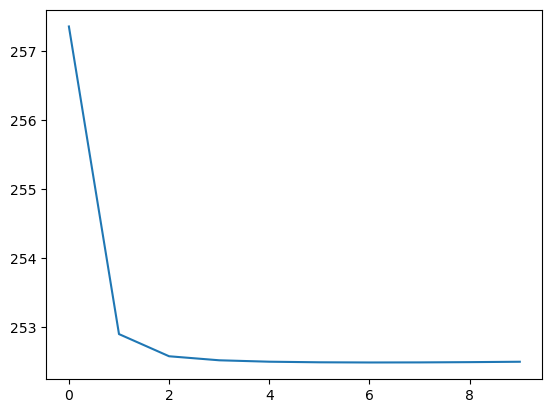

In [13]:

plt.plot(log_likelihoods)

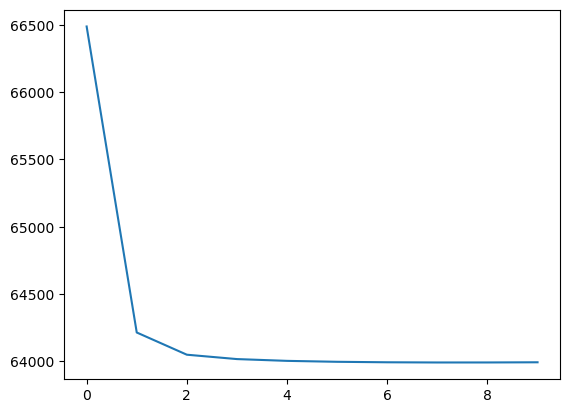

In [10]:
plt.plot(RMSE)